# ***Student Name: Tushar Panchal***

# ***En. No. : 21162101014***

# ***Branch: CBA***

# ***Batch:  61***

# ***Subject: DMW (Data Mining & Warehousing)***

# **PRACTICAL 9**
#  Clustering-I

1. Read the data
2. Find the null values in the data
3. Remove the tuples having the null values
4. Remove the dulicate values
5. Finalize the value of K


plot the points of the dataset using scatterplot x,y annual income and spending score

In [1]:
import pandas as pd
import io

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
dataset = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))

In [4]:
dataset

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
X= dataset.iloc[:,[2,3]]

In [7]:
X = X.values

In [8]:
X[:5]

array([[19, 15],
       [21, 15],
       [20, 16],
       [23, 16],
       [31, 17]])

In [9]:
from sklearn.cluster import KMeans

In [10]:
wcss=[]

In [11]:
for i in range(1,11):
  kmeans = KMeans(n_clusters = i,random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

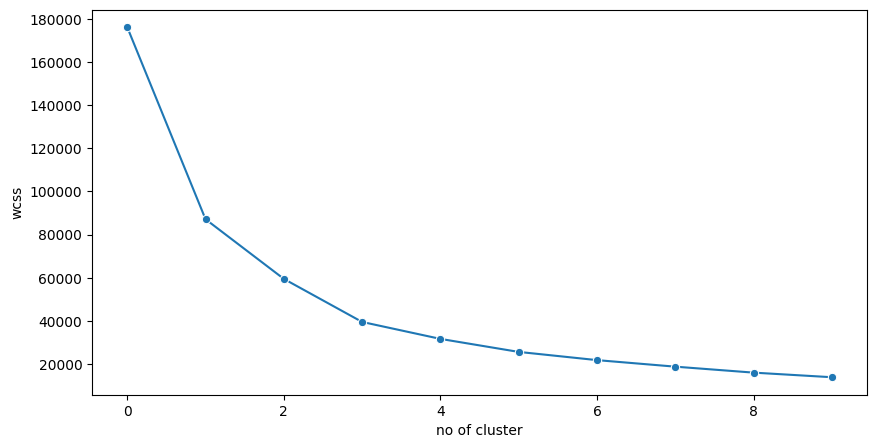

In [12]:
from seaborn.widgets import color_palette
from matplotlib import colors
plt.figure(figsize=(10,5))
sns.lineplot(data=wcss,sizes=range(1,11),marker='o')
plt.title("")
plt.xlabel("no of cluster")
plt.ylabel("wcss")
plt.show()

In [13]:
## for k=5
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [14]:
y_kmeans = kmeans.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


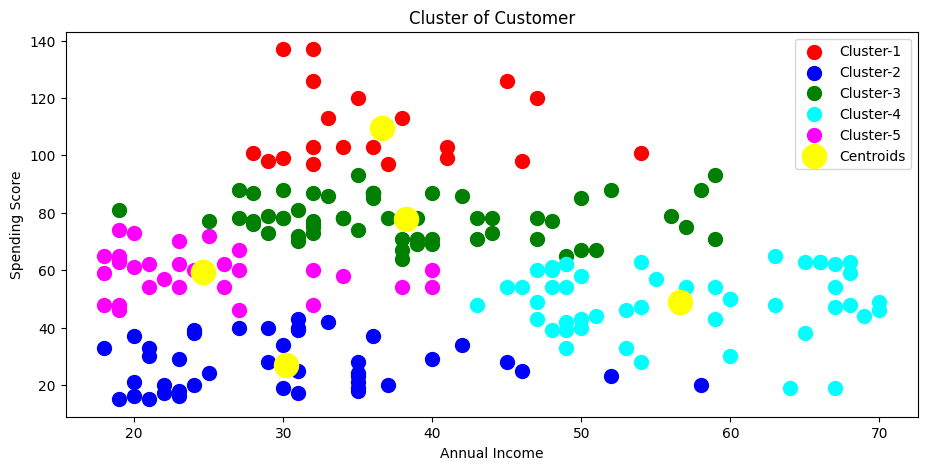

In [15]:
plt.figure(figsize=(11,5))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster-1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster-2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster-3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Cluster-4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='Cluster-5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label="Centroids")
plt.grid(False)
plt.title("Cluster of Customer")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()